In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/mta.csv")

df.columns = ["date", "new_entries"]
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek + 1
df["week_count"] = -1

In [3]:
week_count = 0

for i in range(len(df)):
    if df.iloc[i]["day_of_week"] == 1:
        week_count += 1
    df.iloc[i, df.columns.get_loc('week_count')] = week_count

In [4]:
Q1 = df["new_entries"].quantile(.05)
Q3 = df["new_entries"].quantile(.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sub = df[(df["date"] >= "2020-03-01") & (df["date"] <= "2021-07-31")]
df_sub = df_sub[(df_sub["new_entries"] > 0) & (df_sub["new_entries"] <= upper_bound)]
df_sub.head()

,date,new_entries,day_of_week,week_count
62,2020-03-01,1450214,7,9
63,2020-03-02,2917035,1,10
64,2020-03-03,2957872,2,10
65,2020-03-04,2953711,3,10
66,2020-03-05,2952771,4,10


In [5]:
weeks_max = df_sub.groupby("week_count").max("new_entries").reset_index()
weeks_min = df_sub.groupby("week_count").min("new_entries").reset_index()

In [6]:
print("Maximum MTA Ridership:")

count =  []

for i in range(len(weeks_max)):
    day_of_week = int(df_sub[(df_sub["week_count"] == int(weeks_max.iloc[i]["week_count"])) &
                             (df_sub["new_entries"] == int(weeks_max.iloc[i]["new_entries"]))]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Maximum MTA Ridership:


3    21
4    20
5    16
2    13
1     4
7     1
dtype: int64

In [7]:
print("Minimum MTA Ridership:")

count =  []

for i in range(len(weeks_min)):
    day_of_week = int(df_sub[(df_sub["week_count"] == int(weeks_min.iloc[i]["week_count"])) &
                             (df_sub["new_entries"] == int(weeks_min.iloc[i]["new_entries"]))]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Minimum MTA Ridership:


7    70
5     2
1     1
4     1
6     1
dtype: int64

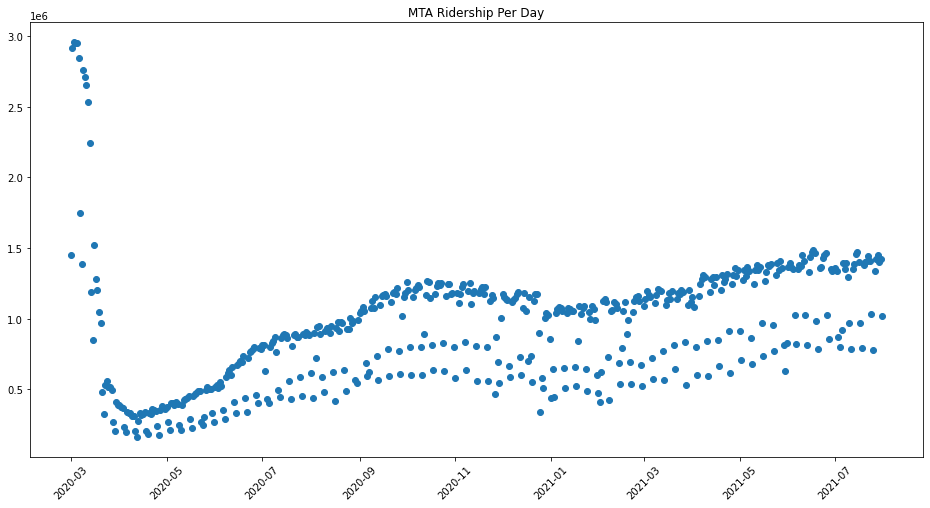

In [8]:
x = df_sub["date"].to_list()
y = df_sub["new_entries"].to_list()

fig, ax = plt.subplots()
plt.xticks(rotation=45)
plt.title("MTA Ridership Per Day")
fig.set_size_inches(16, 8)
ax.plot(x, y, 'o')
plt.show()